In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
%matplotlib inline
 
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
 
    

# sales_data = pd.read_csv('retail_sales.csv')
# sales_data['date']=pd.to_datetime(sales_data['date'])
# sales_data.set_index('date', inplace=True)
 
# sales_data.plot()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("upsldc.csv",index_col=0)
# data = data.loc['1985-01-01':]

data.head()


,Schedule(MW),Drawl(MW),OD/UD(MW),Demand(MW),Total SSGS(MW),UP Thermal Generation (MW),IPP Thermal Generation (MW),UP Hydro Generation (MW),Co-gen/CPP Generation (MW),RE/Solar Generation (MW),Frequency (Hz),Deviation Rate (Paise/Unit)
Time Stamp,,,,,,,,,,,,
2018-11-18 12:25:15.636365,4230,3989,-241,11217,7236,3589,3371,275,400,180,49.88,448.92
2018-11-18 12:25:47.489097,4230,4010,-220,11270,7260,3596,3392,272,400,180,49.94,303.04
2018-11-18 12:26:14.219461,4230,4010,-220,11270,7260,3596,3392,272,400,180,49.94,303.04
2018-11-18 12:27:37.255027,4230,4010,-220,11270,7260,3596,3392,272,400,180,49.94,303.04
2018-11-18 12:29:20.373452,4230,4010,-220,11270,7260,3596,3392,272,400,180,49.94,303.04


In [3]:
data.index = pd.to_datetime(data.index)
data.head()

,Schedule(MW),Drawl(MW),OD/UD(MW),Demand(MW),Total SSGS(MW),UP Thermal Generation (MW),IPP Thermal Generation (MW),UP Hydro Generation (MW),Co-gen/CPP Generation (MW),RE/Solar Generation (MW),Frequency (Hz),Deviation Rate (Paise/Unit)
Time Stamp,,,,,,,,,,,,
2018-11-18 12:25:15.636365,4230,3989,-241,11217,7236,3589,3371,275,400,180,49.88,448.92
2018-11-18 12:25:47.489097,4230,4010,-220,11270,7260,3596,3392,272,400,180,49.94,303.04
2018-11-18 12:26:14.219461,4230,4010,-220,11270,7260,3596,3392,272,400,180,49.94,303.04
2018-11-18 12:27:37.255027,4230,4010,-220,11270,7260,3596,3392,272,400,180,49.94,303.04
2018-11-18 12:29:20.373452,4230,4010,-220,11270,7260,3596,3392,272,400,180,49.94,303.04


In [4]:
data = data['Demand(MW)']
data.head()
len(data)

1330

In [5]:
data.columns = ['Energy Production']
data.head()

Time Stamp
2018-11-18 12:25:15.636365    11217
2018-11-18 12:25:47.489097    11270
2018-11-18 12:26:14.219461    11270
2018-11-18 12:27:37.255027    11270
2018-11-18 12:29:20.373452    11270
Name: Demand(MW), dtype: int64

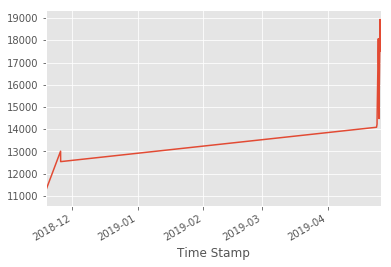

In [6]:
data = data.astype('float64')
data.head()
data.plot()

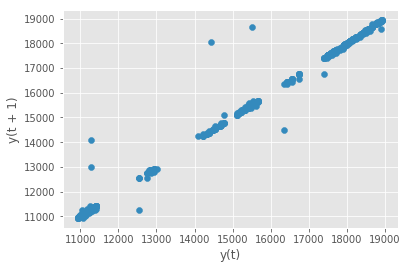

In [7]:
pd.plotting.lag_plot(data)

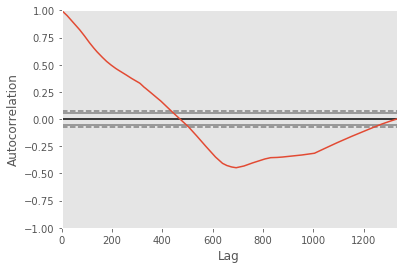

In [8]:
pd.plotting.autocorrelation_plot(data)

In [9]:
data.corr(data.shift(48))

0.9219120395599908

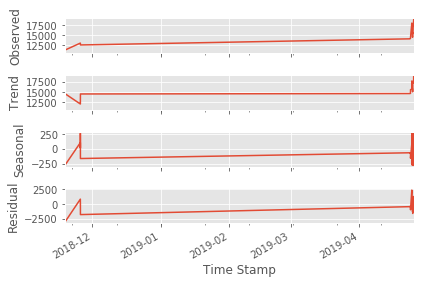

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data, model='additive', freq=96)
x = decomposed.plot() #See note below about this

In [11]:
dt = data.copy(deep=True)
dt= data.diff()
dt= data.diff()
dt= data.diff()
dt= data.diff()
# dt['Energy Production'] = dt['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()

In [12]:
data.head()

Time Stamp
2018-11-18 12:25:15.636365    11217.0
2018-11-18 12:25:47.489097    11270.0
2018-11-18 12:26:14.219461    11270.0
2018-11-18 12:27:37.255027    11270.0
2018-11-18 12:29:20.373452    11270.0
Name: Demand(MW), dtype: float64

In [13]:
dt = dt.iloc[4:]
dt.head()

Time Stamp
2018-11-18 12:29:20.373452      0.0
2018-11-18 12:29:56.526219      0.0
2018-11-18 12:30:30.729356      0.0
2018-11-18 12:31:04.687450      0.0
2018-11-18 12:31:38.290746    123.0
Name: Demand(MW), dtype: float64

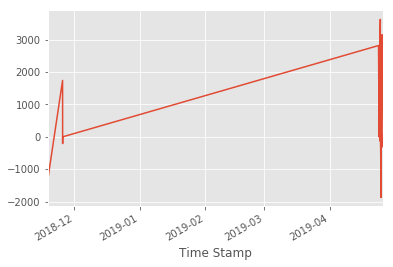

In [14]:
dt.plot()

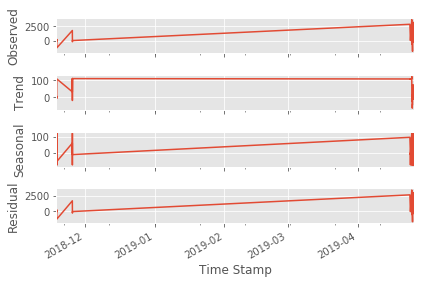

In [15]:
decomposed = seasonal_decompose(dt, model='additive', freq=48)
x = decomposed.plot()

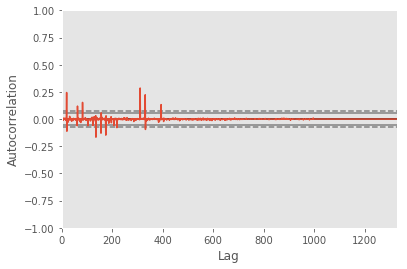

In [16]:
pd.plotting.autocorrelation_plot(dt)

In [17]:
from statsmodels.tsa.ar_model import AR
 
#create train/test datasets
X = dt.dropna()
train_data = X[:int((len(X)*70)/100)]
test_data = X[int((len(X)*70)/100):]
 
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [18]:
print('The lag value chose is: %s' % model_fitted.k_ar)
 
 
print('The coefficients of the model are:\n %s' % model_fitted.params)
 


The lag value chose is: 21
The coefficients of the model are:
 const             3.929590
L1.Demand(MW)    -0.078932
L2.Demand(MW)    -0.009835
L3.Demand(MW)    -0.010861
L4.Demand(MW)     0.006768
L5.Demand(MW)    -0.019970
L6.Demand(MW)     0.000568
L7.Demand(MW)    -0.012320
L8.Demand(MW)     0.005628
L9.Demand(MW)    -0.002687
L10.Demand(MW)    0.004873
L11.Demand(MW)    0.007290
L12.Demand(MW)    0.003180
L13.Demand(MW)    0.006988
L14.Demand(MW)    0.008618
L15.Demand(MW)    0.009917
L16.Demand(MW)   -0.011575
L17.Demand(MW)   -0.002607
L18.Demand(MW)   -0.011465
L19.Demand(MW)    0.049534
L20.Demand(MW)    0.324791
L21.Demand(MW)   -0.093962
dtype: float64


/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


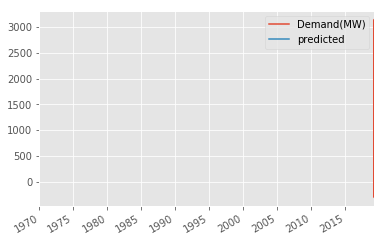

In [19]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
 
# create a comparison dataframe
compare_df = pd.concat(
    [X[int((len(X)*70)/100):],
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})
 
#plot the two values
compare_df.plot()

In [20]:
from sklearn.metrics import r2_score
 
r2 = r2_score(X[int((len(X)*70)/100):], predictions)
r2

-0.0001287997291186116

In [21]:
import math
from sklearn.metrics import mean_squared_error


# trainPredict = scaler.inverse_transform(trainPredict)
# testPredict = scaler.inverse_transform(testPredict)

# ytrain = scaler.inverse_transform([Ytrain])
# ytest = scaler.inverse_transform([Ytest])
    
# trainScore = math.sqrt(mean_squared_error(ytrain[0], X[:int((len(X)*70)/100)]))    
# print("train Score", trainScore)

testScore = math.sqrt(mean_squared_error(X[int((len(X)*70)/100):], predictions))    
print("train Score", testScore)
# print(ytest[0])

train Score 160.13465113984034
